In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

# 28x28 grayscale
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

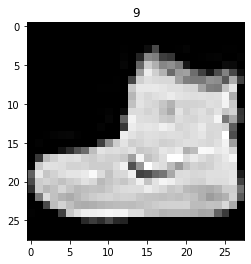

In [2]:
# mnist visualize
import matplotlib.pyplot as plt
plt.imshow(train_images[0],cmap='gray')
plt.title(train_labels[0])

In [3]:
# image 0
print(train_images[0,:,:])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

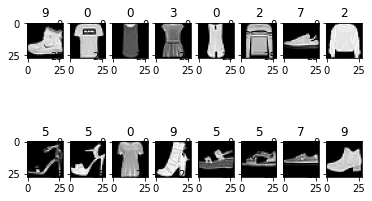

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Back','Ankle boot']
def image_table(row,col,train_images,train_labels):
    for i in range(row*col):
        plt.subplot(row, col, i+1)
        plt.imshow(train_images[i],cmap='gray')
        plt.title(train_labels[i])
        # plt.title(class_names[train_labels[i]])

image_table(2,8,train_images,train_labels)

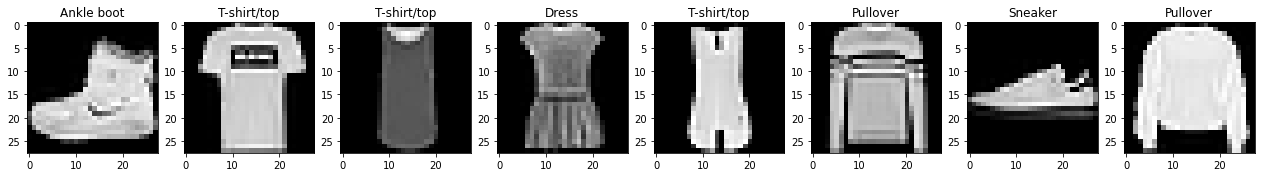

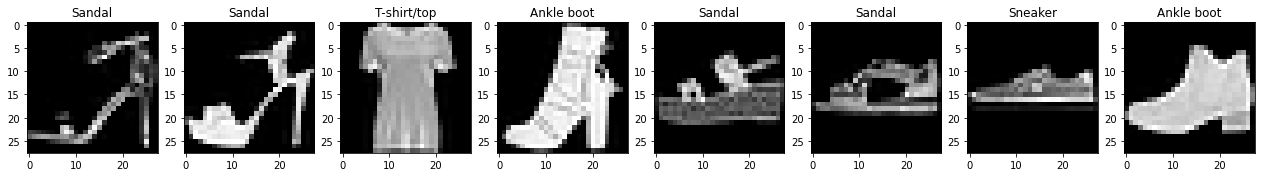

In [21]:
def show_image(images,labels,ncols=0):
    figure, axs = plt.subplots(figsize=(22,6),nrows=1,ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i],cmap='gray')
        axs[i].set_title(class_names[labels[i]])
show_image(train_images[:8],train_labels[:8],ncols=8)
show_image(train_images[8:16],train_labels[8:16],ncols=8)

In [9]:
scaling_img = np.array([img/255 for img in train_images])
print(scaling_img.shape)
print(scaling_img[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [14]:
def get_processed_data(images,labels):
    return np.array([img/255 for img in images]),labels
scailing_data,labels = get_processed_data(train_images,train_labels)
print(scailing_data[0])
print(labels[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [15]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [17]:
def one_hot_encoder(labels):
    one_hot = []
    for label in labels:
        temp = [0 for _ in range(10)]
        temp[label] += 1
        one_hot.append(temp)
    return one_hot
one_hot_labels = np.array(one_hot_encoder(train_labels))
print(one_hot_labels)

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
from tensorflow.keras.utils import to_categorical
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [18]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()
opt = optimizers.Adam(learning_rate=0.001)
loss = losses.sparse_categorical_crossentropy # sparse 와 차이점: sparse 인코딩 x
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
model.fit(train_images,train_labels,batch_size=200,epochs=30)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence thi

2022-03-08 15:22:57.779729: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-08 15:22:57.779953: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


300/300 [==============================] - 0s 638us/step - loss: 18.3617 - accuracy: 0.5912
Epoch 2/30
300/300 [==============================] - 0s 600us/step - loss: 1.1688 - accuracy: 0.7227
Epoch 3/30
300/300 [==============================] - 0s 601us/step - loss: 0.8216 - accuracy: 0.7521
Epoch 4/30
300/300 [==============================] - 0s 602us/step - loss: 0.6947 - accuracy: 0.7793
Epoch 5/30
300/300 [==============================] - 0s 602us/step - loss: 0.6090 - accuracy: 0.7994
Epoch 6/30
300/300 [==============================] - 0s 609us/step - loss: 0.5609 - accuracy: 0.8027
Epoch 7/30
300/300 [==============================] - 0s 621us/step - loss: 0.5242 - accuracy: 0.8165
Epoch 8/30
300/300 [==============================] - 0s 601us/step - loss: 0.4967 - accuracy: 0.8238
Epoch 9/30
300/300 [==============================] - 0s 598us/step - loss: 0.4660 - accuracy: 0.8340
Epoch 10/30
300/300 [==============================] - 0s 596us/step - loss: 0.4548 - accura

In [22]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model = Sequential([
    Flatten(input_shape=(28,28)), # vectorize
    Dense(100,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()
opt = optimizers.Adam(learning_rate=0.001)
loss = losses.categorical_crossentropy # sparse 와 차이점: sparse 인코딩 x
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
history = model.fit(train_images,one_hot_labels,batch_size=200,epochs=30)

print(history.history['loss'])
print(history.history['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence thi

In [24]:
pred = model.predict(test_images)
loss,acc = model.evaluate(test_images,test_oh_labels,batch_size=64)
print('acc:',acc)

157/157 [==============================] - 0s 268us/step - loss: 0.4135 - accuracy: 0.8652
acc: 0.8651999831199646


In [26]:
# train set 을 train,test 로 분리하여 검증
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_img,val_img,tr_labels,val_labels = train_test_split(train_images,train_labels,
                                                       test_size=0.15,random_state=3)
tr_label_oh = to_categorical(tr_labels)
val_label_oh = to_categorical(val_labels)

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model = Sequential([
    Flatten(input_shape=(28,28)), # vectorize
    Dense(100,activation='relu'),
    Dense(30,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()
opt = optimizers.Adam(learning_rate=0.001)
loss = losses.categorical_crossentropy # sparse 와 차이점: sparse 인코딩 x
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
history = model.fit(tr_img,tr_label_oh,batch_size=128,epochs=30,validation_data=(val_img,val_label_oh))
model.evaluate(val_img,val_label_oh,batch_size=64)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence thi

[0.40660566091537476, 0.8743333220481873]

In [27]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[2.117960214614868, 1.1626509428024292, 1.013901710510254, 0.9333674311637878, 0.8146018981933594, 0.7036951780319214, 0.6401363015174866, 0.6045231223106384, 0.5801909565925598, 0.523060142993927, 0.4769342541694641, 0.4534651041030884, 0.4259224832057953, 0.4147399663925171, 0.40285369753837585, 0.39058127999305725, 0.3924242854118347, 0.38161879777908325, 0.36340194940567017, 0.35347461700439453, 0.35704511404037476, 0.34943917393684387, 0.3378700613975525, 0.3343278467655182, 0.32480695843696594, 0.3178130090236664, 0.3023921251296997, 0.29829034209251404, 0.3013065755367279, 0.2802571952342987]
[0.4413921535015106, 0.5767058730125427, 0.607568621635437, 0.6247059106826782, 0.6837450861930847, 0.7292745113372803, 0.7437843084335327, 0.7583333253860474, 0.7676862478256226, 0.8072941303253174, 0.8353529572486877, 0.8485490083694458, 0.8572157025337219, 0.8611568808555603, 0.8664705753326416, 0.8689019680023193, 0.86811763048172, 0.8722745180130005, 0.8779608011245728, 0.8796274662017

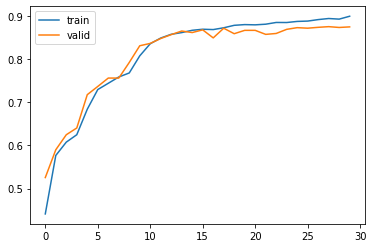

In [28]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='valid')
plt.legend()

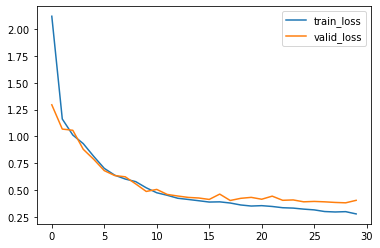

In [29]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='valid_loss')
plt.legend()